In [1]:
import os
import subprocess
from pathlib import Path
from IPython import get_ipython
import re

In [2]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is 3428-9B03

 Directory of c:\Users\ARYAN SURI\Desktop\tessdatatrain\tesstrain

07-04-2025  18:54    <DIR>          .
02-03-2025  09:28    <DIR>          ..
28-01-2025  13:29    <DIR>          .github
28-01-2025  13:29                28 .gitignore
28-01-2025  13:29               264 .pylintrc
28-01-2025  13:29             1,634 count_chars.py
02-03-2025  12:53    <DIR>          data
07-04-2025  18:52           196,743 eval.ipynb
28-01-2025  13:29             1,068 generate_eval_train.py
28-01-2025  13:29             1,095 generate_gt_from_box.py
28-01-2025  13:29             1,527 generate_line_box.py
28-01-2025  13:29             2,336 generate_line_syllable_box.py
28-01-2025  13:29             1,316 generate_wordstr_box.py
28-01-2025  13:29            10,349 LICENSE
28-01-2025  13:29            17,854 Makefile
28-01-2025  13:29             1,385 normalize.py
28-01-2025  13:29         5,524,523 ocrd-testset.zip
28-01-2025  13:29       

### Get number of checkpoints

In [3]:
# Get number of checkpoints
def count_files_in_folder(folder_path):
    folder = Path(folder_path)
    if not folder.is_dir():
        raise ValueError(f"{folder_path} is not a valid directory")
    return len([f for f in folder.iterdir() if f.is_file()])

folder_path = r'C:\Users\ARYAN SURI\Desktop\tessdatatrain\tesstrain\data\extraction'
counter=count_files_in_folder(folder_path)
print(f"Number of files in {folder_path}: {counter}")

Number of files in C:\Users\ARYAN SURI\Desktop\tessdatatrain\tesstrain\data\extraction: 10


Automated script to evaluate each checkpoint and store error

In [4]:
#Automate the process

# Define your cell content as strings
cell_1_code = """
command = ['make', 'evaluation', 'MODEL_NAME=extraction']

output_lines=[]
# Run the command and print output in real-time
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, encoding='utf-8')

# Print the output line by line
for line in process.stdout:
    print(line, end='')
    output_lines.append(line)

# Wait for the process to complete and get the return code
process.wait()
print(f"Process finished with return code {process.returncode}")
output = ''.join(output_lines)
"""

cell_2_code = """
pattern = r'(time[\s\S]+?)(?=make)'

match = re.search(pattern,output)

if match:
    extracted_command = match.group(0)
    print("Extracted Command:")
    print(extracted_command)

    # Path to Git Bash
    git_bash_path = "C:/Program Files/Git/bin/bash.exe"

    # Run the command using subprocess
    try:
        process = subprocess.Popen([git_bash_path, '-c', extracted_command], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True, encoding='utf-8')

        # Print the output line by line
        for line in process.stdout:
            print(line, end='')

        # Print any errors
        for line in process.stderr:
            print(line, end='')

        # Wait for the process to complete and get the return code
        process.wait()
        print(f"Process finished with return code {process.returncode}")

    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Command not found in the output.")
"""

# Get the current IPython instance
ipython = get_ipython()

# Loop to run these cells multiple times
for i in range(counter):
    print(f"Iteration {i+1}: Running cells")
    ipython.run_cell(cell_1_code)
    ipython.run_cell(cell_2_code)

Iteration 1: Running cells
You are using make version: 4.4.1
File not found - *.gt.txt
File not found - *.gt.txt
make: Nothing to be done for 'evaluation'.
Process finished with return code 0
Command not found in the output.
Iteration 2: Running cells
You are using make version: 4.4.1
File not found - *.gt.txt
File not found - *.gt.txt
make: Nothing to be done for 'evaluation'.
Process finished with return code 0
Command not found in the output.
Iteration 3: Running cells
You are using make version: 4.4.1
File not found - *.gt.txt
File not found - *.gt.txt
make: Nothing to be done for 'evaluation'.
Process finished with return code 0
Command not found in the output.
Iteration 4: Running cells
You are using make version: 4.4.1
File not found - *.gt.txt
File not found - *.gt.txt
make: Nothing to be done for 'evaluation'.
Process finished with return code 0
Command not found in the output.
Iteration 5: Running cells
You are using make version: 4.4.1
File not found - *.gt.txt
File not foun

## Training and Eval Error Plot


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def read_eval_error(log_folder, metric):
    iterations = []
    errors = []
    for log_file in os.listdir(log_folder):
        if log_file.endswith('.eval.log'):
            iteration = int(re.search(r'_(\d+)\.eval\.log', log_file).group(1))
            with open(os.path.join(log_folder, log_file), 'r') as file:
                for line in file:
                    regex = rf'{metric} eval=([\d.]+)'
                    match = re.search(regex, line)
                    if match:
                        iterations.append(iteration)
                        errors.append(float(match.group(1)))
                        break
    return pd.DataFrame({'Iteration': iterations, 'Eval Error': errors})

In [7]:
def read_training_error(log_file, metric):
    iterations = []
    errors = []
    with open(log_file, 'r') as file:
        for line in file:
            regex = rf'At iteration \d+/\d+/(\d+), .* {metric} train=([\d.]+)%'
            match = re.search(regex, line)
            if match:
                iterations.append(int(match.group(1)))
                errors.append(float(match.group(2)))
    return pd.DataFrame({'Iteration': iterations, 'Training Error': errors})

In [9]:
model_name='extraction'
training_cer = read_training_error(f'data/{model_name}/training.log','BCER')
training_wer = read_training_error(f'data/{model_name}/training.log','BWER')

In [10]:
eval_cer = read_eval_error(f'data/{model_name}/eval', 'BCER')
eval_wer = read_eval_error(f'data/{model_name}/eval', 'BWER')

In [11]:
eval_cer

,Iteration,Eval Error
0,1000,14.643
1,800,14.182
2,700,12.736
3,600,16.962
4,500,20.194
5,400,17.250
6,300,19.592
7,200,19.606
8,100,28.391


In [12]:
char_data = pd.merge(training_cer, eval_cer, on='Iteration', how='inner').sort_values(by='Iteration')
char_data

,Iteration,Training Error,Eval Error
0,100,43.533,28.391
1,200,35.100,19.606
2,300,29.322,19.592
3,400,25.242,17.250
4,500,24.207,20.194
5,600,23.447,16.962
6,700,22.288,12.736
7,800,21.090,14.182
8,1000,20.332,14.643


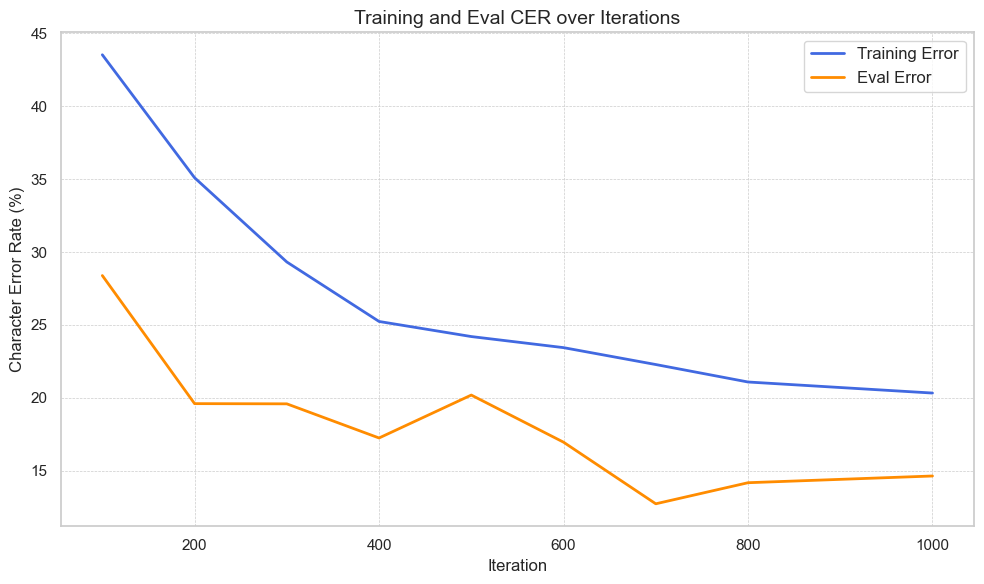

In [13]:
import seaborn as sns

filtered_data=char_data

# Set seaborn style for a cleaner look
sns.set_theme(style="whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))  # Slightly wider figure for better readability

# Plot training and Eval error with thicker lines and custom colors
plt.plot(filtered_data['Iteration'], filtered_data['Training Error'], label='Training Error', color='royalblue', linewidth=2)
plt.plot(filtered_data['Iteration'], filtered_data['Eval Error'], label='Eval Error', color='darkorange', linewidth=2)

# Labels and title
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Character Error Rate (%)', fontsize=12)
plt.title('Training and Eval CER over Iterations', fontsize=14)

# Legend with improved font size
plt.legend(fontsize=12)

# Grid lines with a light touch
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ensure a clean layout
plt.tight_layout()

# Display the plot
plt.show()

In [14]:
word_data = pd.merge(training_wer, eval_wer, on='Iteration', how='inner').sort_values(by='Iteration')
word_data

,Iteration,Training Error,Eval Error
0,100,50.000,34.578
1,200,40.000,26.003
2,300,34.667,25.588
3,400,31.250,21.992
4,500,29.600,25.588
5,600,28.833,21.992
6,700,27.714,17.427
7,800,26.250,18.672
8,1000,25.600,18.811


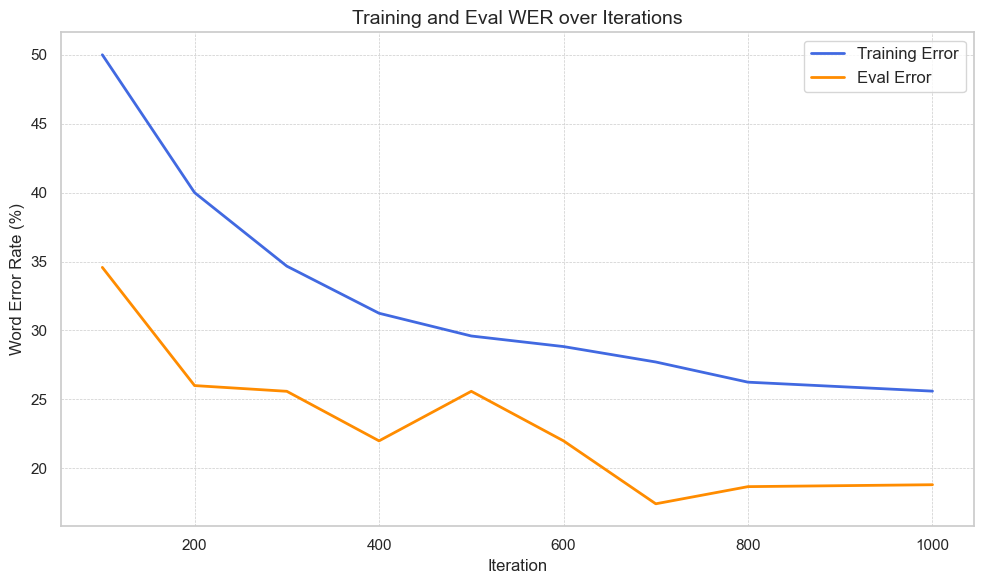

In [15]:
filtered_data=word_data

# Set seaborn style for a cleaner look
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))  # Slightly wider figure for better readability

# Plot training and Eval error with thicker lines and custom colors
plt.plot(filtered_data['Iteration'], filtered_data['Training Error'], label='Training Error', color='royalblue', linewidth=2)
plt.plot(filtered_data['Iteration'], filtered_data['Eval Error'], label='Eval Error', color='darkorange', linewidth=2)

# Labels and title
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Word Error Rate (%)', fontsize=12)
plt.title('Training and Eval WER over Iterations', fontsize=14)

# Legend with improved font size
plt.legend(fontsize=12)

# Grid lines with a light touch
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ensure a clean layout
plt.tight_layout()

# Display the plot
plt.show()

In [1]:
import pytesseract
from PIL import Image

image=Image.open(r'A:\Projects\SanskritConversion\SanskritConversion\images\WhatsApp Image 2025-03-02 at 19.23.35_9427094a.jpg')
text=pytesseract.image_to_string(image,lang='extraction')
print(text)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Define ground truth and predicted text
ground_truth = "नैकायाः तथैव नौकाकर्मचारिणां साहाय्यं कर्तव्यम्‌ कदापि यदि नौका आपद्ग्रता"
predicted_text = "नैकायाः तथैव नौकाकर्मचारिणं साहायं कर्तव्यम्‌ कदापि यदिनौका आपद्रस्ता " # This is the output from Tesseract

# Convert the texts into character-level lists
ground_truth_chars = list(ground_truth)
predicted_chars = list(predicted_text)

# Pad the shorter list with empty characters to match lengths
max_len = max(len(ground_truth_chars), len(predicted_chars))
ground_truth_chars.extend([''] * (max_len - len(ground_truth_chars)))
predicted_chars.extend([''] * (max_len - len(predicted_chars)))

# Create the confusion matrix
conf_matrix = confusion_matrix(ground_truth_chars, predicted_chars, labels=np.unique(ground_truth_chars + predicted_chars))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=np.unique(ground_truth_chars + predicted_chars), yticklabels=np.unique(ground_truth_chars + predicted_chars), cmap="Blues")
plt.xlabel('Predicted Characters')
plt.ylabel('True Characters')
plt.title('Confusion Matrix for Tesseract OCR')
plt.show()

# Print classification report
print(classification_report(ground_truth_chars, predicted_chars))

c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2307 (\N{DEVANAGARI SIGN VISARGA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 

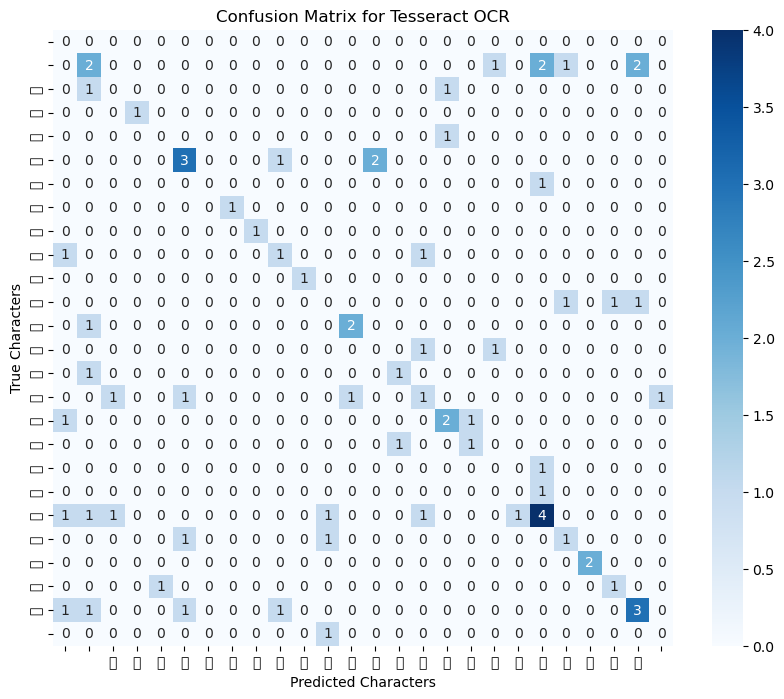

              precision    recall  f1-score   support

                   0.00      0.00      0.00         0
                   0.29      0.25      0.27         8
           ं       0.00      0.00      0.00         2
           ः       1.00      1.00      1.00         1
           आ       0.00      0.00      0.00         1
           क       0.50      0.50      0.50         6
           ग       0.00      0.00      0.00         1
           च       1.00      1.00      1.00         1
           ण       1.00      1.00      1.00         1
           त       0.33      0.33      0.33         3
           थ       1.00      1.00      1.00         1
           द       0.00      0.00      0.00         3
           न       0.67      0.67      0.67         3
           प       0.00      0.00      0.00         2
           म       0.50      0.50      0.50         2
           य       0.25      0.20      0.22         5
           र       0.50      0.50      0.50         4
           व       0.50    

c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Define ground truth and predicted text
ground_truth = "नैकायाः तथैव नौकाकर्मचारिणां साहाय्यं कर्तव्यम्‌ कदापि यदि नौका आपद्ग्रता"
predicted_text = "नैकायाः तथैव नौकाकर्मचारिणं साहायं कर्तव्यम्‌ कदापि यदिनौका आपद्रस्ता" # This is the output from Tesseract

# Convert the texts into character-level lists
ground_truth_chars = list(ground_truth)
predicted_chars = list(predicted_text)

# Pad the shorter list with empty characters to match lengths
max_len = max(len(ground_truth_chars), len(predicted_chars))
ground_truth_chars.extend([''] * (max_len - len(ground_truth_chars)))
predicted_chars.extend([''] * (max_len - len(predicted_chars)))

# Create the confusion matrix
conf_matrix = confusion_matrix(ground_truth_chars, predicted_chars, labels=np.unique(ground_truth_chars + predicted_chars))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=np.unique(ground_truth_chars + predicted_chars), yticklabels=np.unique(ground_truth_chars + predicted_chars), cmap="Blues")
plt.xlabel('Predicted Characters')
plt.ylabel('True Characters')
plt.title('Confusion Matrix for Tesseract OCR')
plt.show()

# Print classification report
print(classification_report(ground_truth_chars, predicted_chars))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\IPython\core\events.py:82: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\ARYAN SURI\.conda\envs\py310\lib\site-pack

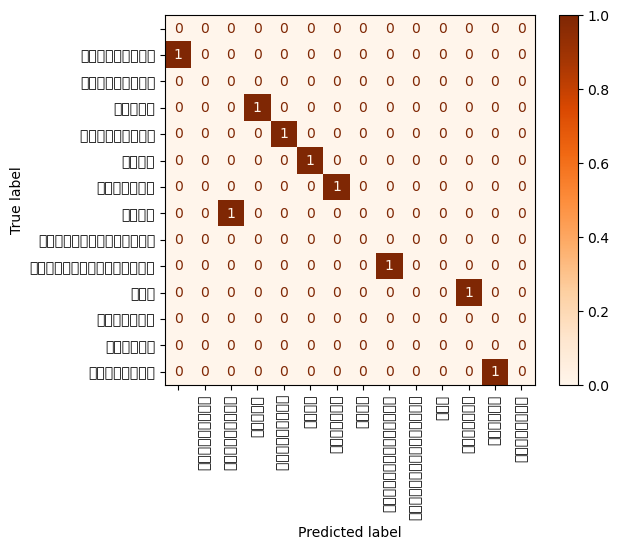

In [6]:
ground_truth = "नैकायाः तथैव नौकाकर्मचारिणां साहाय्यं कर्तव्यम्‌ कदापि यदि नौका आपद्ग्रता"
predicted_text = "नैकायाः तथैव नौकाकर्मचारिणं साहायं कर्तव्यम्‌ कदापि यदिनौका आपद्रस्ता"

gt_words = ground_truth.split()
pred_words = predicted_text.split()

# Pad to equal length
max_len = max(len(gt_words), len(pred_words))
gt_words += [''] * (max_len - len(gt_words))
pred_words += [''] * (max_len - len(pred_words))

# Then you can compute the confusion matrix like before
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = sorted(set(gt_words + pred_words))
cm = confusion_matrix(gt_words, pred_words, labels=labels)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90, cmap="Oranges")
